In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
# from torchvision.transforms import transforms
# from torchvision.datasets import ImageFolder
# import torchvision.models as models
from torch.utils.data import Dataset,DataLoader,TensorDataset
# import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import os
# from PIL import Image
BASE_DIR = os.getcwd()

: 

In [ ]:
device = "cuda"if torch.cuda.is_available() else "cpu"
print("Device using:", device)

Device using: cuda


In [ ]:
class ImageDataset(Dataset):
    def __init__(self,data,label):
        super().__init__()
        self.data = data
        self.label = label
    def __len__(self):
        return len(self.data)
    def __getitem__(self, index):
        image = self.data.iloc[index]
        label = torch.tensor(self.label[index], dtype=torch.float32)
        return image,label

In [ ]:
data_dict = torch.load(os.path.join(BASE_DIR,"Cleaned_data.pt"),weights_only=False)
tensor__data = data_dict['data']
tensor__data = torch.stack(tensor__data.tolist())
label__data = data_dict['label']
label__data = [0 if a=="cat"else 1 if a=="dog" else 2 for a in label__data]
label__data = torch.tensor(label__data)
train_dataset = TensorDataset(tensor__data, label__data)
tensor__val = data_dict['valdata']
tensor__val = torch.stack(tensor__val.tolist())
label__val = data_dict['vallabel']
label__val = [0 if a=="cat"else 1 if a=="dog" else 2 for a in label__val]
label__val = torch.tensor(label__val)
val_dataset = TensorDataset(tensor__val, label__val)
print(len(val_dataset))
# print(f"Data tensor shape: {tensor__data.shape}")
# print(type(tensor__data), {tensor__data[0]})
# print(f"Label data sample: {label__data[:10]}")
# dataset = ImageDataset(tensor__data,label__data)
# train_size = int(0.8 * len(dataset))  # 80% for training
# val_size = len(dataset) - train_size
# indices = torch.randperm(len(dataset)).tolist()
# train_indices = indices[:train_size]
# val_indices = indices[train_size:]
# train_sampler = SubsetRandomSampler(train_indices)
# val_sampler = SubsetRandomSampler(val_indices)

753


In [ ]:
bs=64
num_workers=2
# train_size = int(0.8 * len(dataset))  # 80% for training
# val_size = len(dataset) - train_size
# indices = torch.randperm(len(dataset)).tolist()
# train_indices = indices[:train_size]
# val_indices = indices[train_size:]
# train_sampler = SubsetRandomSampler(train_indices)
# val_sampler = SubsetRandomSampler(val_indices)
train_loader = DataLoader(dataset=train_dataset,shuffle=True,batch_size=bs)#,num_workers=num_workers)
val_loader = DataLoader(dataset=val_dataset,shuffle=True,batch_size=bs)
# val_loader = DataLoader(dataset=dataset,sampler=val_sampler,batch_size=bs,num_workers=num_workers,pin_memory=True)
print(f"Dataset length: {len(train_loader)}")
print(f"Dataset length: {len(val_loader)}")
# print(f"Train loader batches: {next(iter(train_loader))}")

Dataset length: 12
Dataset length: 12


In [ ]:
# for image, label in train_loader:
#     print(f"Image shape: {image.shape}")
#     print(f"labels shape: {label.shape}")
#     break

In [ ]:
class PetClassificationCNN(nn.Module):
    def __init__(self,input_size=1,output_size=3,kernel=3,stride=2,padding=1):
        super(PetClassificationCNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=input_size,out_channels=32,kernel_size=kernel,stride=stride,padding=padding)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(kernel_size=kernel,stride=stride)
        self.dp1 = nn.Dropout(p=0.5)

        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=kernel,stride=stride,padding=padding)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU(inplace=True)
        self.pool2 = nn.MaxPool2d(kernel_size=kernel,stride=stride)
        self.dp2 = nn.Dropout(p=0.5)

        self.conv3 = nn.Conv2d(in_channels=64,out_channels=16,kernel_size=kernel,stride=stride,padding=padding)
        self.bn3 = nn.BatchNorm2d(16)
        self.relu3 = nn.ReLU(inplace=True)
        self.pool3 = nn.MaxPool2d(kernel_size=kernel,stride=stride)
        self.dp3 = nn.Dropout(p=0.5)

        # self.conv4 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=kernel,stride=stride,padding=padding)
        # self.bn4 = nn.BatchNorm2d(32)
        # self.relu4 = nn.ReLU(inplace=True)
        # self.pool4 = nn.MaxPool2d(kernel_size=kernel,stride=stride)
        # self.dp4 = nn.Dropout(p=0.25)

        # self.conv5 = nn.Conv2d(in_channels=32,out_channels=16,kernel_size=kernel,stride=stride,padding=padding)
        # self.bn5 = nn.BatchNorm2d(16)
        # self.relu5 = nn.ReLU(inplace=True)
        # self.pool5 = nn.MaxPool2d(kernel_size=kernel,stride=stride)
        # self.dp5 = nn.Dropout(p=0.25)

        self.fc4 = nn.Linear(16, 512)
        self.relu4 = nn.ReLU(inplace=True) 

        self.dp4 = nn.Dropout(p=0.5)
        
        self.fc5 = nn.Linear(512, output_size)
    
    def forward(self,x):
        # print('check')
        x=self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x=self.dp1(x)
        x=self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x=self.dp2(x)
        x=self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x=self.dp3(x)
        # x=self.pool4(self.relu4(self.bn4(self.conv4(x))))
        # print(x.shape)
        # x=self.dp4(x)
        # x=self.pool5(self.relu5(self.bn5(self.conv5(x))))
        # x=self.dp5(x)
        x = x.view(x.size(0), -1)
        x = self.relu4(self.fc4(x))  # fc9 + relu
        x = self.dp4(x)  # dropout10
        return self.fc5(x)

In [ ]:
# sample_batch, sample_labels = next(iter(train_loader))
# input_channels = sample_batch.shape[1]  # 1 for grayscale
# height = sample_batch.shape[2]          # 299
# width = sample_batch.shape[3]           # 299
num_classes = 3   
learning = 0.001
epochs = 100
criteria = nn.CrossEntropyLoss()
model = PetClassificationCNN(3,3).to(device=device)
optium = optim.AdamW(model.parameters(),lr=learning,weight_decay=0.1)

In [ ]:
# torch.cuda.empty_cache()
# scaler = torch.cuda.amp.GradScaler(device)
model.train()
train_loss, train_accuracy = [], []
val_loss, val_accuracy = [], []
for epoch in range(epochs):
    # print("Entering training loop...")
    correct_pred, total_pred, current_train_loss = 0,0,0
    for image, label in train_loader:
        # print('check')
        image, label = image.to(device),label.to(device)
        # torch.cuda.synchronize()
        optium.zero_grad()
        output = model(image)
        loss = criteria(output,label)
        current_train_loss += loss.item()
        # print(output , label)
        _, predicted = torch.max(output, 1)
        correct_pred += (predicted == label).sum().item()
        total_pred += label.size(0)
        # print(correct_pred,total_pred)
        loss.backward()
        optium.step()
    train_loss.append(current_train_loss)
    train_accuracy.append(correct_pred/total_pred)
    # print(correct_pred,total_pred)
    model.eval()
    with torch.no_grad():
        correct_pred, total_pred,current_val_loss = 0,0,0
        for image,label in val_loader:
            image, label = image.to(device),label.to(device)
            # torch.cuda.synchronize()
            output = model(image)
            loss = criteria(output,label)
            current_val_loss += loss.item()
            _, predicted = torch.max(output, 1)
            correct_pred += (predicted == label).sum().item()
            total_pred += label.size(0)
        val_accuracy.append(correct_pred/total_pred)
        val_loss.append(current_val_loss)
    print(f"""epoch: [{epoch+1}/{epochs}], train loss: {current_train_loss:4f}, train acc: {train_accuracy[-1]:4f}, val loss: {current_val_loss:4f}, val acc: {val_accuracy[-1]:4f}""")
# print(correct_pred,total_pred)

epoch: [1/100], train loss: 14.788622, train acc: 0.324037, val loss: 13.202358, val acc: 0.333333
epoch: [2/100], train loss: 13.138798, train acc: 0.346614, val loss: 13.130538, val acc: 0.342629
epoch: [3/100], train loss: 12.953126, train acc: 0.411687, val loss: 13.029421, val acc: 0.410359
epoch: [4/100], train loss: 12.399044, train acc: 0.549801, val loss: 12.755975, val acc: 0.470120
epoch: [5/100], train loss: 11.223255, train acc: 0.571049, val loss: 13.158586, val acc: 0.472776
epoch: [6/100], train loss: 10.691787, train acc: 0.584329, val loss: 12.795654, val acc: 0.494024
epoch: [7/100], train loss: 10.020990, train acc: 0.632138, val loss: 14.465904, val acc: 0.452855
epoch: [8/100], train loss: 9.464274, train acc: 0.667995, val loss: 11.432413, val acc: 0.559097
epoch: [9/100], train loss: 8.029157, train acc: 0.729084, val loss: 11.157275, val acc: 0.579017


KeyboardInterrupt: 

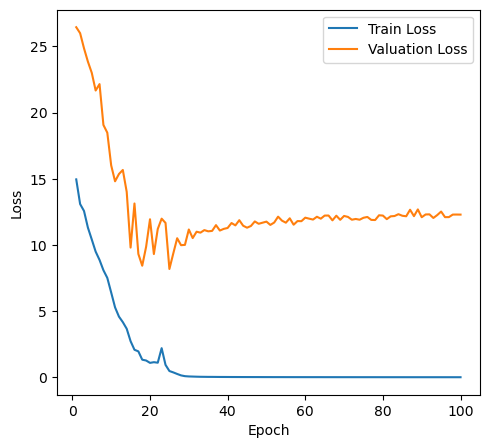

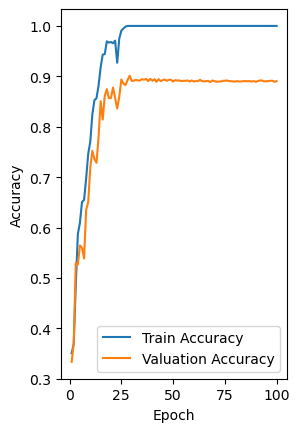

In [ ]:
epochslst = list(range(1, epochs+1))
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochslst,train_loss,label="Train Loss")
plt.plot(epochslst,val_loss,label="Valuation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.subplot(1,2,1)
plt.plot(epochslst,train_accuracy,label="Train Accuracy")
plt.plot(epochslst,val_accuracy,label="Valuation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
torch.save(model.state_dict(),'DCWreg_CNN.pth')